# ICARDA historical phenotypic wheat data analysis

## Load packages, custom functions and data

In [1]:
library(readxl)
library(tidyverse)
library(multtest)
library(asreml)

source("../custom_functions.r")

── Attaching core tidyverse packages ────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame,

Online License checked out Thu Apr 25 17:39:01 2024


In [2]:
asreml.options(workspace="28gb") # add threads=6 on asreml v4.2

In [3]:
data_total <- preprocess("Phenotypic_historical_template - SPRING-WHEAT.xlsx")
write_csv(data_total, "ICARDA_wheat.csv")
genotypes <- distinct(data_total["accenumb"]) |> rename("genotype" = "accenumb")
cat("Wheat data:\n", nrow(data_total), "observations\n", nrow(genotypes), "genotypes\n", nrow(distinct(data_total["campaign"])), "campaigns\n\n")
summary(data_total[c("days_to_heading", "plant_height", "thousand_kernel_weight")])

Warning message:
“Expecting numeric in I43119 / R43119C9: got '98/114'”


Wheat data:
 59269 observations
 22609 genotypes
 28 campaigns



 days_to_heading   plant_height    thousand_kernel_weight
 Min.   :   9.0   Min.   :   0.0   Min.   :  0.00        
 1st Qu.: 128.0   1st Qu.:  88.0   1st Qu.: 27.80        
 Median : 141.0   Median : 103.0   Median : 33.60        
 Mean   : 138.3   Mean   : 102.7   Mean   : 32.89        
 3rd Qu.: 149.0   3rd Qu.: 118.0   3rd Qu.: 39.50        
 Max.   :1120.0   Max.   :1152.0   Max.   :101.00        
 NA's   :1757     NA's   :4851     NA's   :25903         

## Subset data, remove missing values and singletons, make factors

In [4]:
data_sub_HT <- data_total |> filter(between(days_to_heading, 30, 300)) |> make_data_sub("days_to_heading")
data_sub_PH <- data_total |> filter(between(plant_height, 1, 300)) |> make_data_sub("plant_height")
data_sub_TKW <- data_total |> filter(between(thousand_kernel_weight, 1, 100)) |> make_data_sub("thousand_kernel_weight")

47886 days_to_heading rows kept
45648 plant_height rows kept
23242 thousand_kernel_weight rows kept


## Visualise trait values 

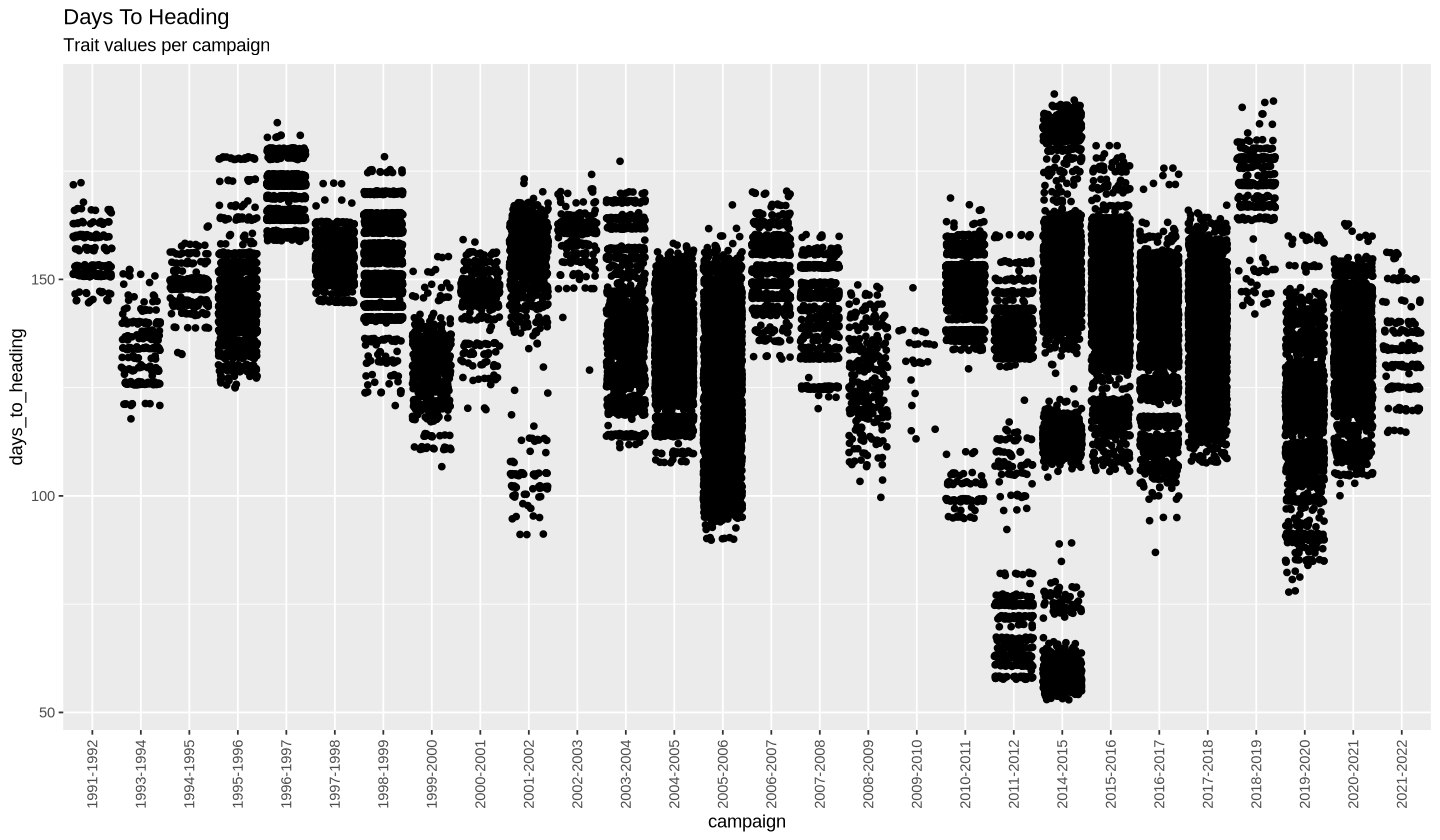

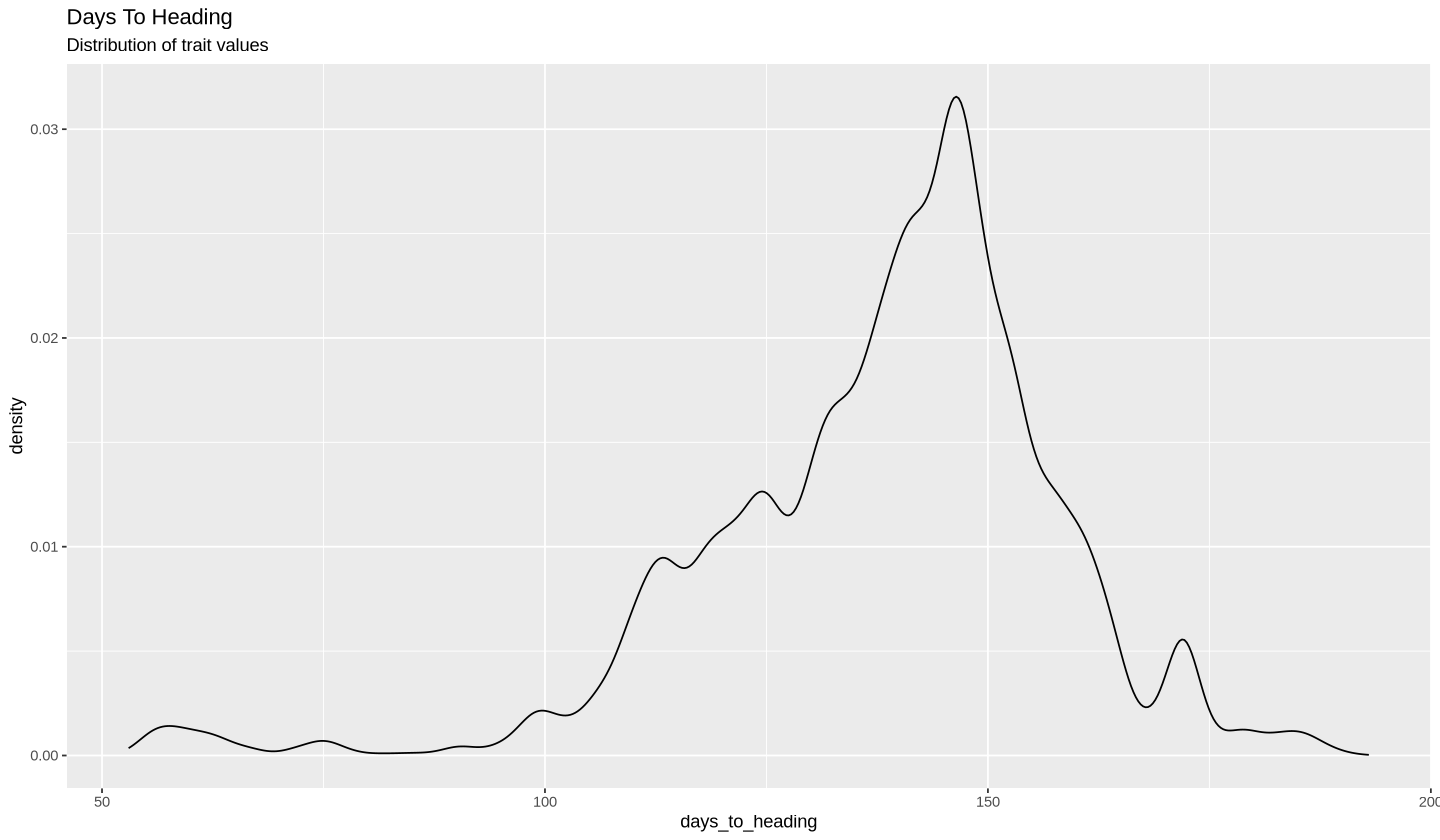

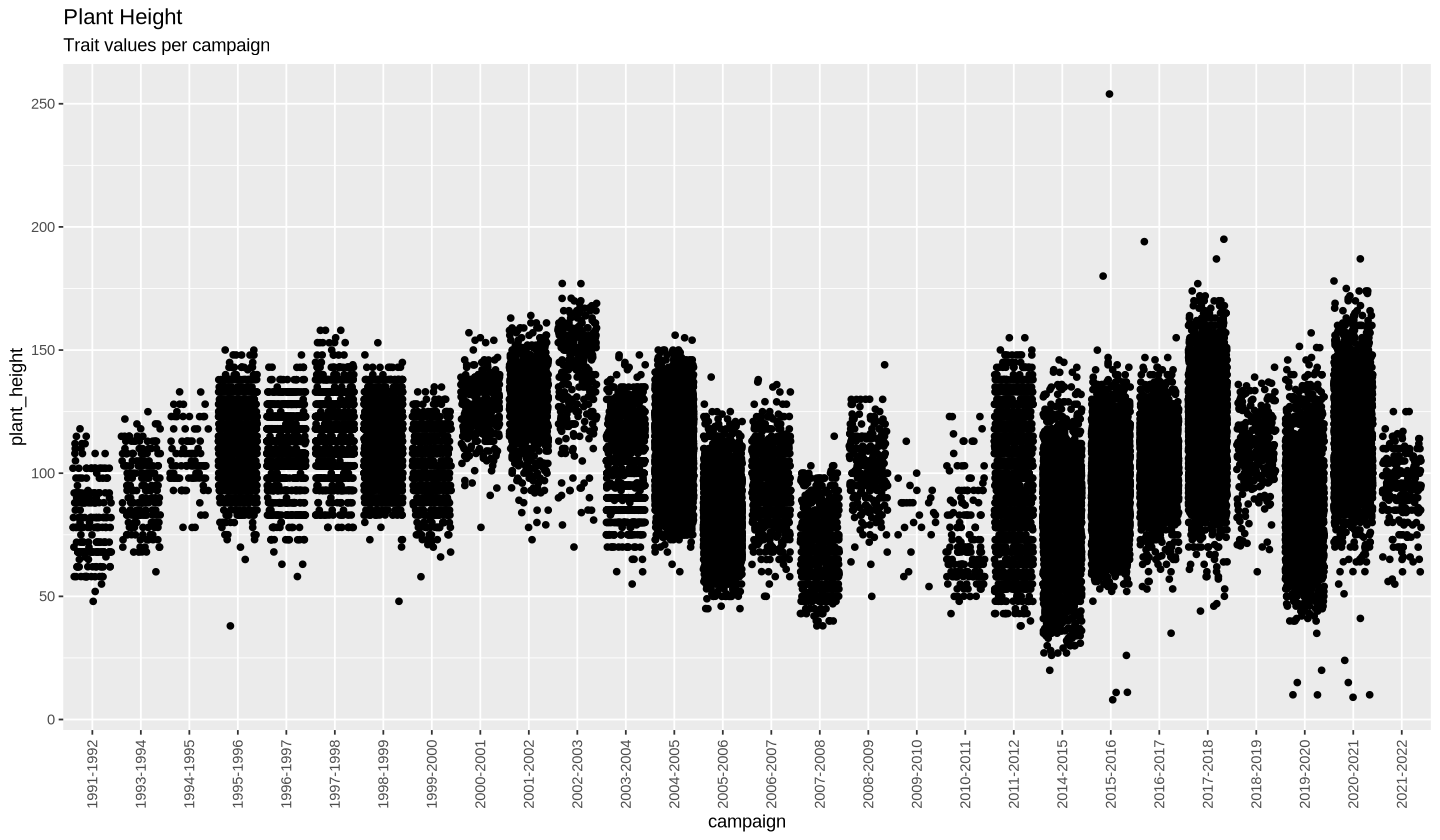

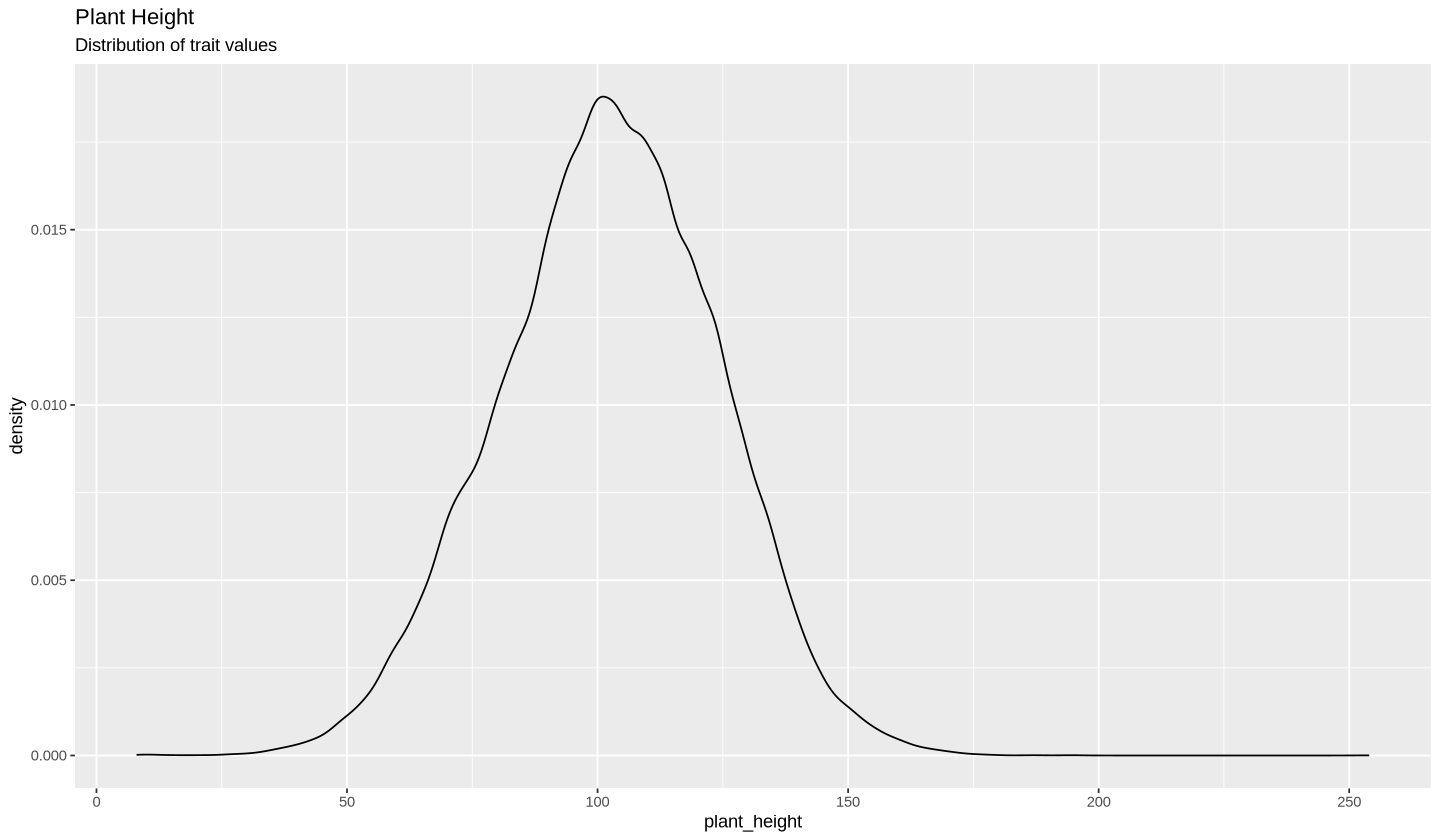

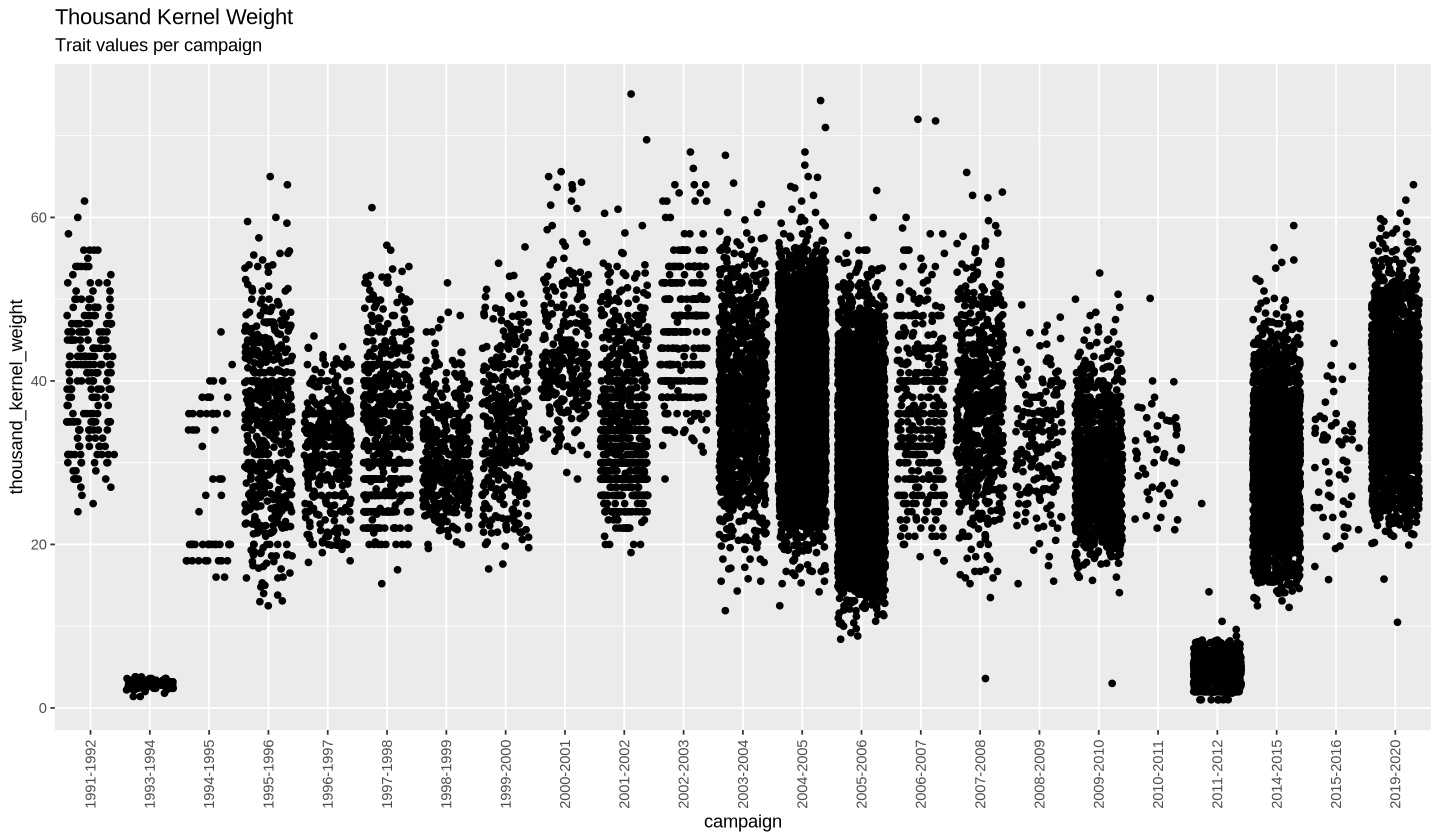

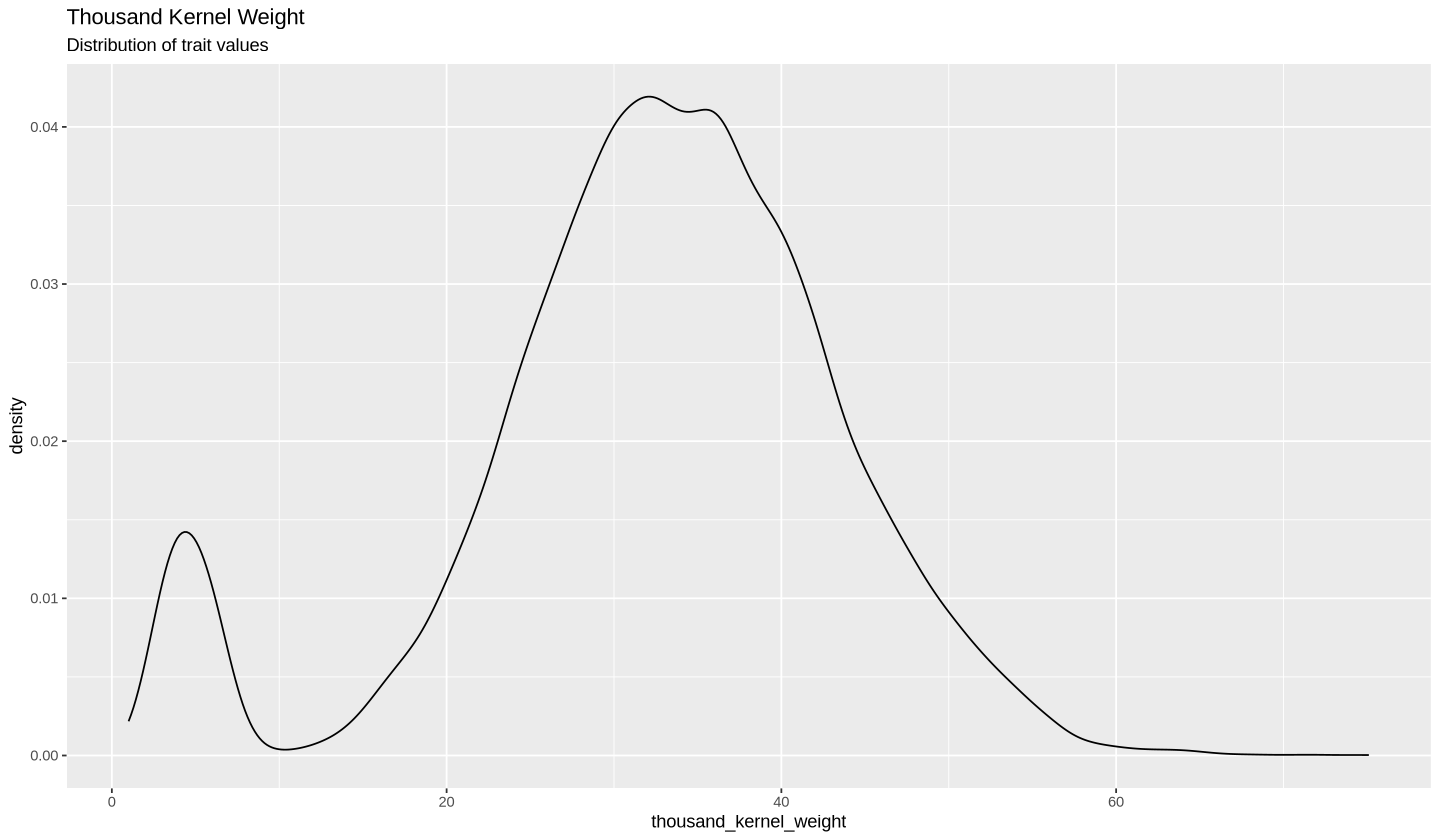

In [5]:
options(repr.plot.width=12, repr.plot.height=7)
data_sub_HT |> visualise_trait(geom_density())
data_sub_PH |> visualise_trait(geom_density())
data_sub_TKW |> visualise_trait(geom_density())

## Extract and format the campaign effects

In [6]:
asreml_campaign_HT <- asreml(fixed = days_to_heading ~campaign, random = ~accenumb, 
                             na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign),
                             data = data_sub_HT)

Online License checked out Thu Apr 25 17:39:09 2024
Multi-section model using the sigma parameterization.
ASReml 4.1.0 Thu Apr 25 17:39:09 2024
Allocating main workspace...done!
          LogLik        Sigma2     DF     wall    cpu
 1     -140592.3           1.0  47858 17:39:22    0.1
 2     -139379.8           1.0  47858 17:39:22    0.1 (1 restrained)
 3     -138470.1           1.0  47858 17:39:22    0.0 (2 restrained)
 4     -138133.7           1.0  47858 17:39:22    0.0 (2 restrained)
 5     -138074.2           1.0  47858 17:39:22    0.0 (2 restrained)
 6     -138072.6           1.0  47858 17:39:22    0.0 (2 restrained)
 7     -138069.3           1.0  47858 17:39:23    0.0 (1 restrained)
 8     -138060.0           1.0  47858 17:39:23    0.0 (1 restrained)
Log-likelihood decreased to  -138080 ; trying with reduced updates (0.0440347)
 9     -138068.5           1.0  47858 17:39:23    0.1
10     -138064.6           1.0  47858 17:39:23    0.0
11     -138080.2           1.0  47858 17:39:

Warning message in asreml(fixed = days_to_heading ~ campaign, random = ~accenumb, :
“Log-likelihood not converged”
Warning message in asreml(fixed = days_to_heading ~ campaign, random = ~accenumb, :
“Some components changed by more than 1% on the last iteration.”


In [7]:
asreml_campaign_PH <- asreml(fixed = plant_height ~campaign, random = ~accenumb,
                             na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                             data = data_sub_PH)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Thu Apr 25 17:39:26 2024
Allocating main workspace...done!
          LogLik        Sigma2     DF     wall    cpu
 1     -149986.5           1.0  45620 17:39:40    0.1
 2     -148483.1           1.0  45620 17:39:40    0.0
 3     -147073.9           1.0  45620 17:39:40    0.0
 4     -146433.1           1.0  45620 17:39:40    0.0
 5     -146278.4           1.0  45620 17:39:40    0.0
 6     -146269.0           1.0  45620 17:39:40    0.0
 7     -146268.6           1.0  45620 17:39:40    0.0
 8     -146268.6           1.0  45620 17:39:40    0.0
 9     -146268.6           1.0  45620 17:39:40    0.0


In [8]:
asreml_campaign_TKW <- asreml(fixed = thousand_kernel_weight ~campaign, random = ~accenumb,
                              na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                              data = data_sub_TKW)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Thu Apr 25 17:39:43 2024
Allocating main workspace...done!
          LogLik        Sigma2     DF     wall    cpu
 1     -54713.76           1.0  23219 17:39:55    0.0
 2     -54170.08           1.0  23219 17:39:55    0.0 (1 restrained)
 3     -53638.81           1.0  23219 17:39:55    0.0 (1 restrained)
 4     -53371.53           1.0  23219 17:39:55    0.0
 5     -53284.85           1.0  23219 17:39:55    0.0
 6     -53273.71           1.0  23219 17:39:55    0.0
 7     -53272.48           1.0  23219 17:39:56    0.0
 8     -53272.33           1.0  23219 17:39:56    0.0
 9     -53272.31           1.0  23219 17:39:56    0.0
10     -53272.30           1.0  23219 17:39:56    0.0
11     -53272.30           1.0  23219 17:39:56    0.0


In [9]:
campaign_effect_HT <- get_campaign_effect(asreml_campaign_HT)
campaign_effect_PH <- get_campaign_effect(asreml_campaign_PH)
campaign_effect_TKW <- get_campaign_effect(asreml_campaign_TKW)

## Extract heterogeneous error variances

In [10]:
error_var_HT <- get_error_var(asreml_campaign_HT)
error_var_PH <- get_error_var(asreml_campaign_PH)
error_var_TKW <- get_error_var(asreml_campaign_TKW)

## Calculate and standardize the coefficient of variation (CV)

In [11]:
CV_df_HT <- make_CV_df(campaign_effect_HT, error_var_HT)
CV_df_PH <- make_CV_df(campaign_effect_PH, error_var_PH)
CV_df_TKW <- make_CV_df(campaign_effect_TKW, error_var_TKW)

## Remove outlier campaigns

In [12]:
data_corrected_HT_I <- data_sub_HT |> correct_I(CV_df_HT)
data_corrected_PH_I <- data_sub_PH |> correct_I(CV_df_PH)
data_corrected_TKW_I <- data_sub_TKW |> correct_I(CV_df_TKW)

1 outlier campaign(s) detected for trait days_to_heading: 2011-2012 
0 outlier campaign(s) detected for trait plant_height
1 outlier campaign(s) detected for trait thousand_kernel_weight: 1993-1994 


## Residuals

In [13]:
qsrgdrfg # wait to see if asreml v4.2 is available

ERROR: Error in eval(expr, envir, enclos): object 'qsrgdrfg' not found


In [ ]:
asreml_res_HT <- asreml(fixed = days_to_heading ~ accenumb, random = ~ campaign,
                 na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                 data = data_corrected_HT_I)

In [ ]:
asreml_res_PH <- asreml(fixed = plant_height ~ accenumb, random = ~ campaign, 
                 na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                 data = data_corrected_PH_I)

In [ ]:
asreml_res_TKW <- asreml(fixed = thousand_kernel_weight ~ accenumb, random = ~ campaign, 
                  na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                  data = data_corrected_TKW_I)

In [ ]:
result_BH_HT <- make_BH_multtest(asreml_res_HT)

In [ ]:
result_BH_PH <- make_BH_multtest(asreml_res_PH)

In [ ]:
result_BH_TKW <- make_BH_multtest(asreml_res_TKW)

In [ ]:
data_corrected_HT_II <- data_corrected_HT_I |> correct_II(result_BH_HT)
data_corrected_PH_II <- data_corrected_PH_I |> correct_II(result_BH_PH)
data_corrected_TKW_II <- data_corrected_TKW_I |> correct_II(result_BH_TKW)
write_csv(data_corrected_HT_II,"data_corrected_HT_II.csv")
write_csv(data_corrected_PH_II,"data_corrected_PH_II.csv")
write_csv(data_corrected_TKW_II,"data_corrected_TKW_II.csv")

## Calculate heritability

In [ ]:
asreml_res_h_HT <- asreml(days_to_heading ~1, random = ~accenumb + campaign, 
                   na.action = na.method(x="omit", y="omit"), 
                   residual = ~dsum( ~id(units) | campaign), data = data_corrected_HT_II)

In [ ]:
asreml_res_h_PH <- asreml(plant_height ~1, random = ~accenumb + campaign, 
                   na.action = na.method(x="omit", y="omit"), 
                   residual = ~dsum( ~id(units) | campaign), data = data_corrected_PH_II)

In [ ]:
asreml_res_h_TKW <- asreml(thousand_kernel_weight ~1, random = ~accenumb + campaign, 
                    na.action = na.method(x="omit", y="omit"),
                    residual = ~dsum( ~id(units) | campaign), data = data_corrected_TKW_II)

In [ ]:
quality_HT <- get_quality(data_sub_HT, asreml_res_h_HT)
quality_PH <- get_quality(data_sub_PH, asreml_res_h_PH)
quality_TKW <- get_quality(data_sub_TKW, asreml_res_h_TKW)
quality_all <- bind_rows(quality_HT, quality_PH, quality_TKW) |> mutate(across(-1, \(x) round(x, 3)))
write_csv(quality_all,"ICARDA_wheat_data_quality.csv")

## Run linear mixed model with outlier corrected data

In [ ]:
asreml_data_HT <- asreml(days_to_heading ~accenumb, random = ~campaign, 
                         na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                         data = data_corrected_HT_II)

In [ ]:
asreml_data_PH <- asreml(plant_height ~accenumb, random = ~campaign, 
                         na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                         data = data_corrected_PH_II)

In [ ]:
asreml_data_TKW <- asreml(thousand_kernel_weight ~accenumb, random = ~campaign, 
                          na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                          data = data_corrected_TKW_II)

## Extract BLUEs and create output file

In [ ]:
BLUEs_HT <- get_BLUEs(asreml_data_HT)
BLUEs_PH <- get_BLUEs(asreml_data_PH)
BLUEs_TKW <- get_BLUEs(asreml_data_TKW)

BLUE_all <- genotypes |> 
                        left_join(BLUEs_HT, by="genotype") |> 
                        left_join(BLUEs_PH, by="genotype") |> 
                        left_join(BLUEs_TKW, by="genotype") |> 
                        arrange(genotype) |> mutate(across(-1, \(x) round(x, 2)))

write_csv(BLUE_all,"ICARDA_wheat_BLUE_values.csv")
summary(BLUE_all)

In [ ]:
library(rmarkdown)
convert_ipynb("ICARDA_historic_wheat_data_analysis.ipynb")

In [ ]:
sessionInfo()